In [70]:
import sys, os, glob, time
import matplotlib.pyplot as plt
oceandirect_path = 'C:/Program Files/Ocean Optics/OceanDirect SDK/Python/'
sys.path.append(os.path.abspath(oceandirect_path))
from Read_Spectrum import *
import pandas as pd

In [ ]:
# lamp on at 2:50 PM, baseline at 3:28PM
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/Gain_Spectra/Base_Throughput.csv')

In [ ]:
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_0.csv')

In [58]:
exposure_times = np.arange(5000, 105000, 5000)
print(exposure_times)

[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000]


Lamp on at 2:50PM, started data taking at 3:28PM. The lamp is on, no filter in place, just changing the exposure time. Longer exposure times at 3:39PM. The light is focused slighly off-axis so the spectrometer isn't oversaturated. 

In [54]:
# for exposure_time in exposure_times:
#     read_spectra(read_all_serial_numbers()[0], exposure_time, 5, f'./Spectral_Files/Darks/Dark_{exposure_time}.csv')
#     time.sleep(1)

Less than 4000 microsecond exposure, the readout is just random. Delete those files. Saturated after 110000

27961.70065076172


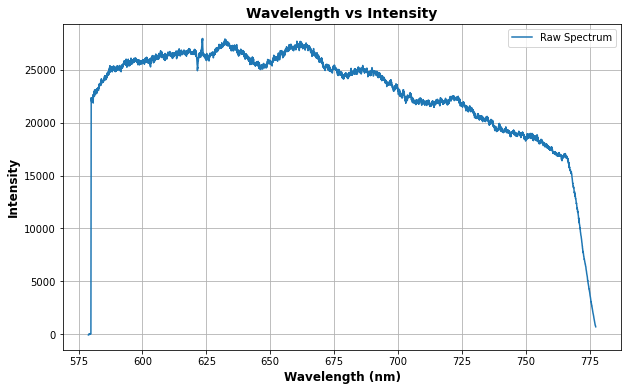

In [49]:
df = pd.read_csv('./Spectral_Files/Gain_Spectra/Spectral_Intensity_95000.csv')

spectral_intensity = df.iloc[:, 1:].median(axis=1)

result = pd.DataFrame({
    'Wavelength': df.iloc[:, 0],
    'Spectral_Intensity': spectral_intensity
})

# find the maximum value of the spectral intensity
max_intensity = result['Spectral_Intensity'].max()
print(max_intensity)

# Step 4: Plot the data
plt.figure(figsize=(10, 6))
# plt.plot(result_base['Wavelength'], result_base['Median_Spectral_Intensity'], marker=' ', linestyle='-', label='Base Spectrum')
plt.plot(result['Wavelength'], result['Spectral_Intensity'], marker=' ', linestyle='-', label='Raw Spectrum')
plt.title('Wavelength vs Intensity', fontweight='bold', fontsize=14)
plt.xlabel('Wavelength (nm)', fontweight='bold', fontsize=12)
plt.ylabel('Intensity', fontweight='bold', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [59]:
max_intensities = []

for exposure_time in exposure_times:
    dark_df = pd.read_csv(f'./Spectral_Files/Darks/Dark_{exposure_time}.csv')
    df = pd.read_csv(f'./Spectral_Files/Gain_Spectra/Spectral_Intensity_{exposure_time}.csv')

    spectral_intensity = df.iloc[:, 1:].median(axis=1) - dark_df.iloc[:, 1:].median(axis=1)

    result = pd.DataFrame({
        'Wavelength': df.iloc[:, 0],
        'Spectral_Intensity': spectral_intensity
    })

    # find the maximum value of the spectral intensity
    max_intensity = result['Spectral_Intensity'].max()
    max_intensities.append(max_intensity)

print(max_intensities)

[1571.5022710561902, 3089.3603283177276, 4607.607383844014, 6164.848732952572, 7734.99509263202, 9236.587951397743, 10786.555244614474, 12348.523377844564, 13842.451505259043, 15337.078711216653, 16825.387045916897, 18266.016107235067, 19853.496918948276, 21010.02833719307, 22560.662174220943, 23996.542592597863, 25423.276352638095, 26800.771458572173, 27910.898061630305, 29083.61999213072]


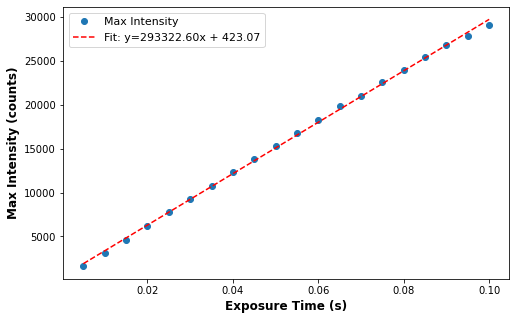

Slope of the linear fit: 293322.60


In [69]:
# Step 1: Fit the data with a linear polynomial (degree 1)
seconds = exposure_times*1e-6
coefficients = np.polyfit(seconds, max_intensities, 1)
slope = coefficients[0]
intercept = coefficients[1]

# Step 2: Generate the fitted line for plotting
fitted_line = np.polyval(coefficients, seconds)

# Step 3: Plot the data and the fitted line
plt.figure(figsize=(8, 5))
plt.plot(seconds, max_intensities, marker='o', linestyle=' ', label='Max Intensity')
plt.plot(seconds, fitted_line, linestyle='--', color='red', label=f'Fit: y={slope:.2f}x + {intercept:.2f}')
plt.xlabel('Exposure Time (s)', fontweight='bold', fontsize=12)
plt.ylabel('Max Intensity (counts)', fontweight='bold', fontsize=12)
plt.legend(fontsize=11)
plt.show()

# Step 4: Print the slope
print(f"Slope of the linear fit: {slope:.2f}")

_Need a flux conversion constant to find the gain from the slope of this line_